# 210420 Fix Component 15

In [1]:
const COMPONENT = 15;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17049135334738351978\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16947829437031924673\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17049135334738351978\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,1391,257758,Streptococcus pseudopneumoniae,species,333,1,NaN,1,11,3,0.846564,2,2,pseudopneumoniae
2,859,1313,Streptococcus pneumoniae,species,333,1,NaN,1,6815,1,0.773292,1,1,pneumoniae
3,1321,28037,Streptococcus mitis,species,333,1,NaN,1,4,2,0.762209,1,1,mitis


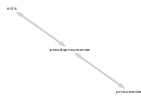

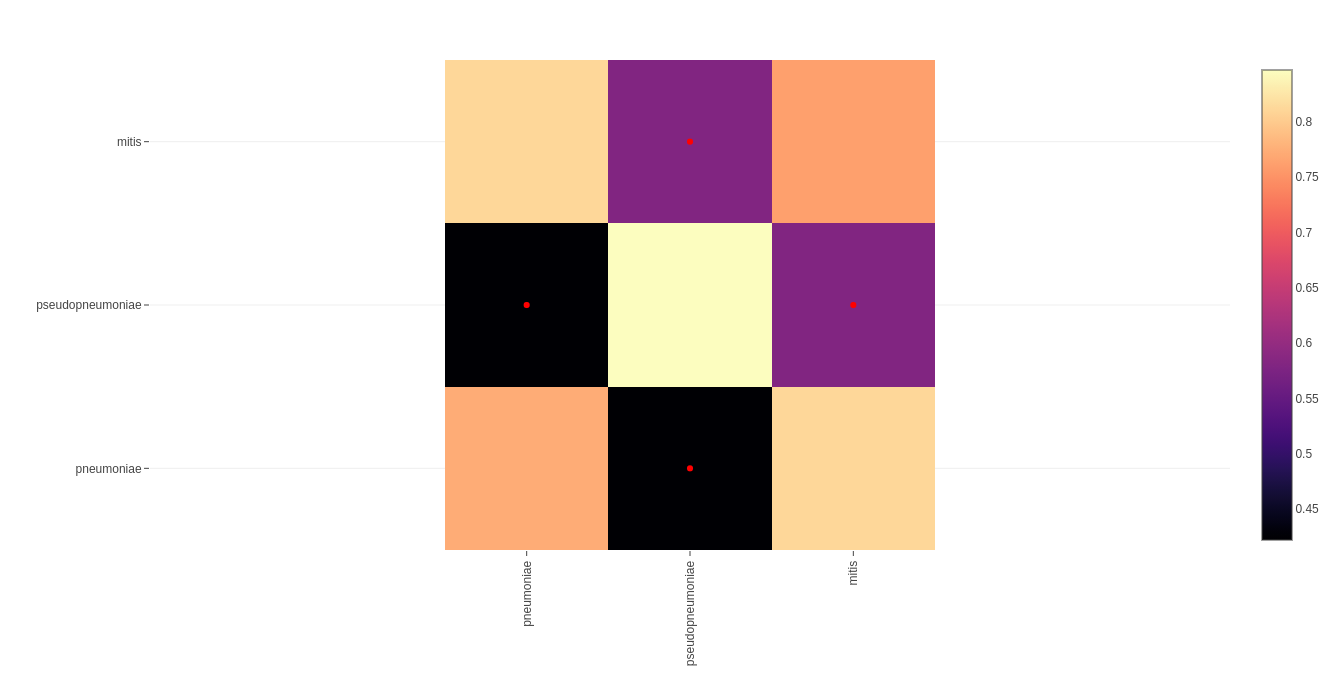

In [2]:
include("fix-component-base.jl");
include("fix-component-base-ext.jl");

In [3]:
trees = Dict{String, Any}();

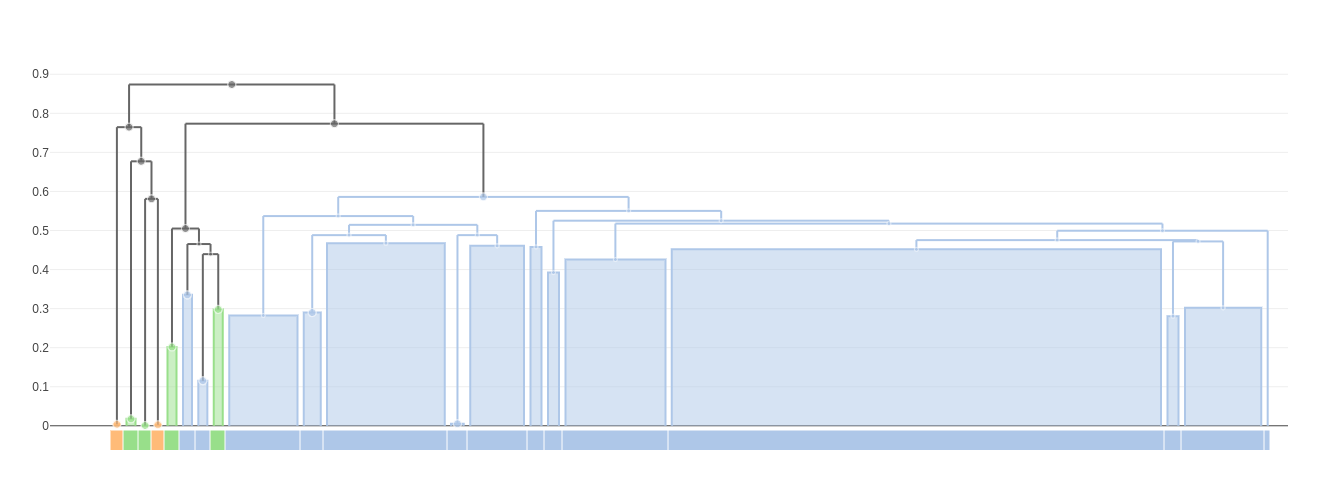

In [4]:
trees["all"] = cluster_annotate(cdata, 1:cdata.ntaxa);

plot(dendrogram(cdata, trees["all"]))

## Edits

### pneumoniae

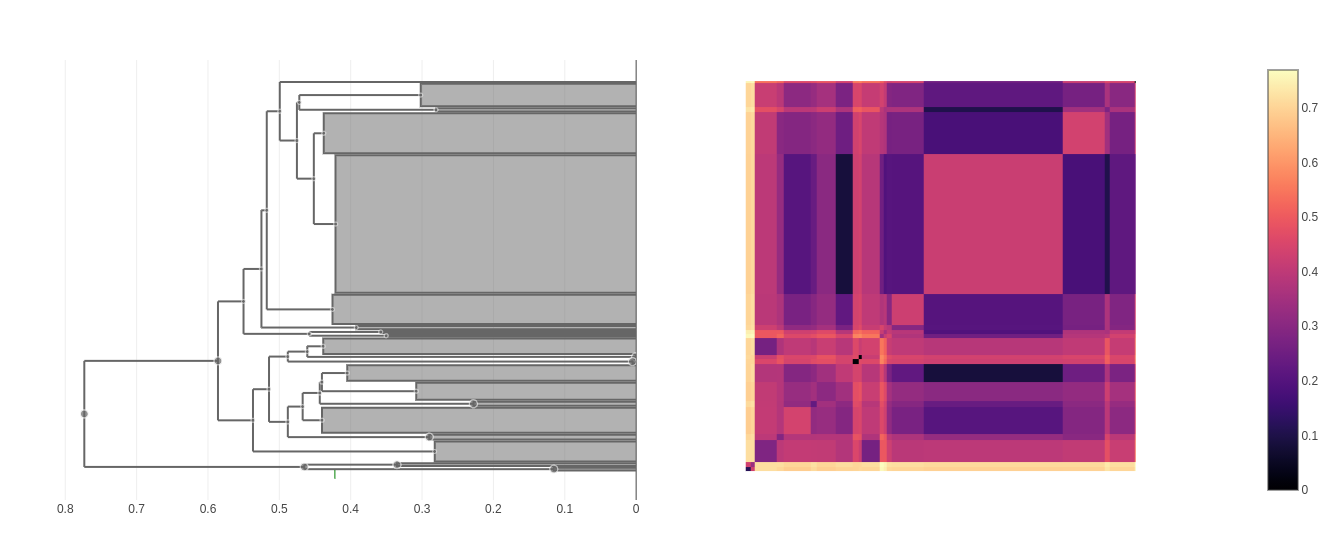

In [5]:
let taxon = "pneumoniae"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [6]:
keep_subtrees!(edits, trees["pneumoniae"], 13628)

#1 pneumoniae:
	6/6815 removed
	Diameter 0.7733 => 0.5860


### pseudopneumoniae/mitis

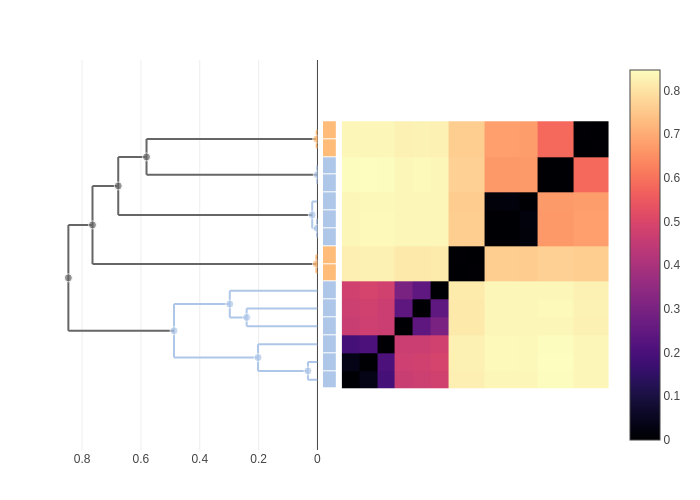

In [7]:
plot(multi_clustermap(cdata, ["pseudopneumoniae", "mitis"]))

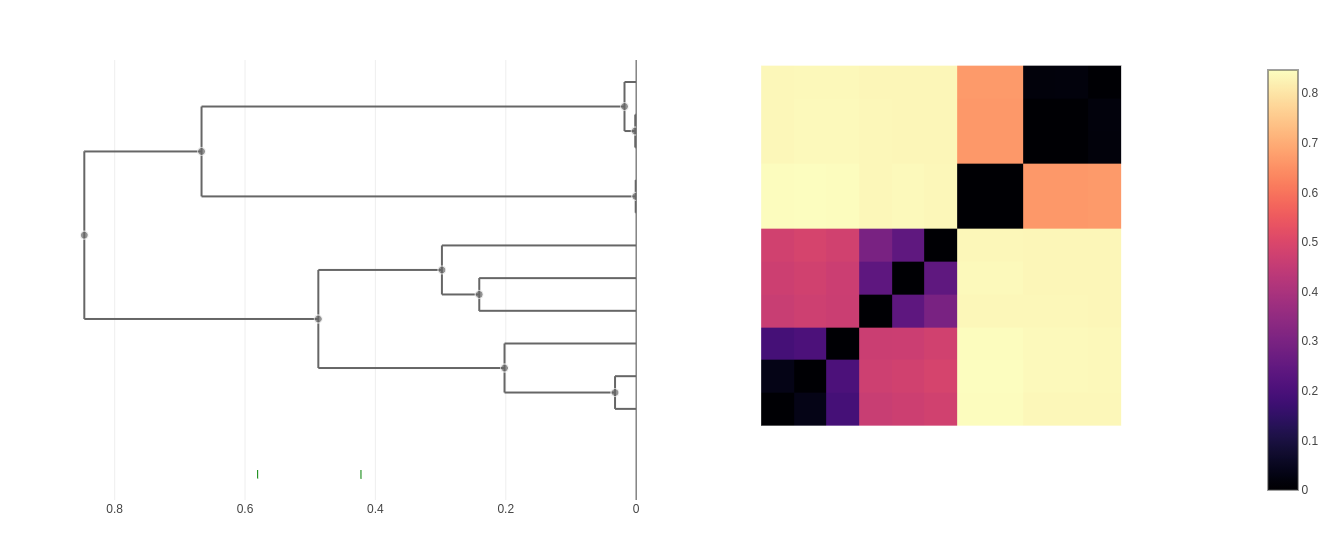

In [8]:
let taxon = "pseudopneumoniae"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [9]:
split_taxon!(edits, trees["pseudopneumoniae"], [19, 20])

Subgroup 1 size: 6
Subgroup 2 size: 5
Genomes to delete: 0


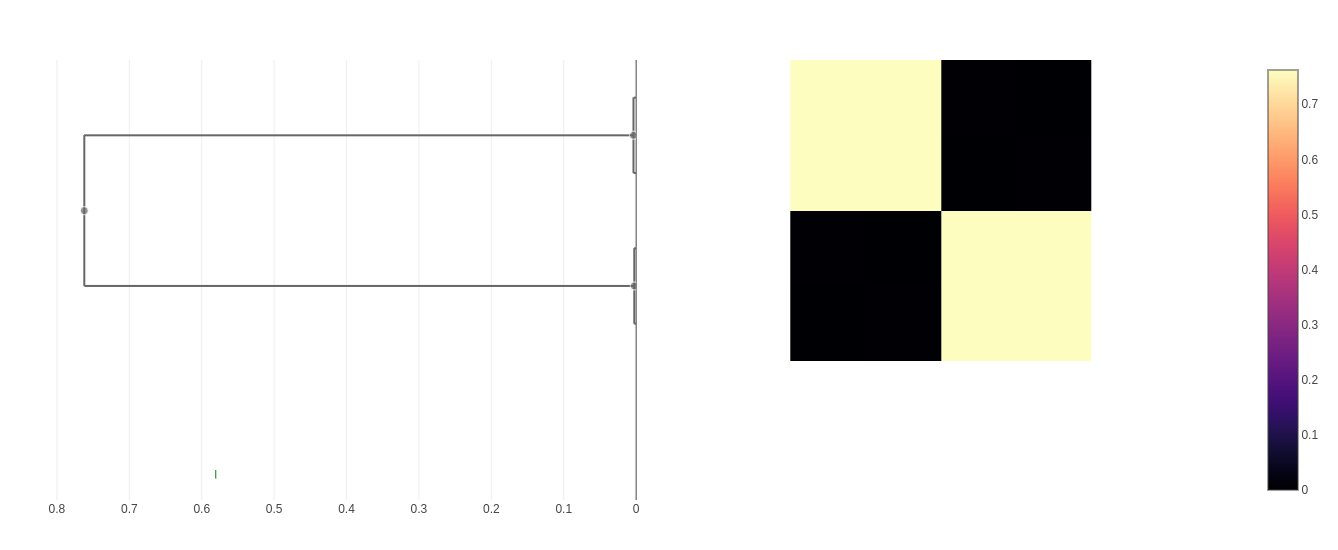

In [10]:
let taxon = "mitis"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [11]:
set_threshold!(edits, "mitis", .5)

0.5

## Additional edits

In [12]:
cdata2 = apply_edits(edits);
edits2 = DatabaseEdits(cdata2);

OverlapAnalysis.print_overlaps(cdata2)

#4 pseudopneumoniae subgroup 2
	=> #2 mitis


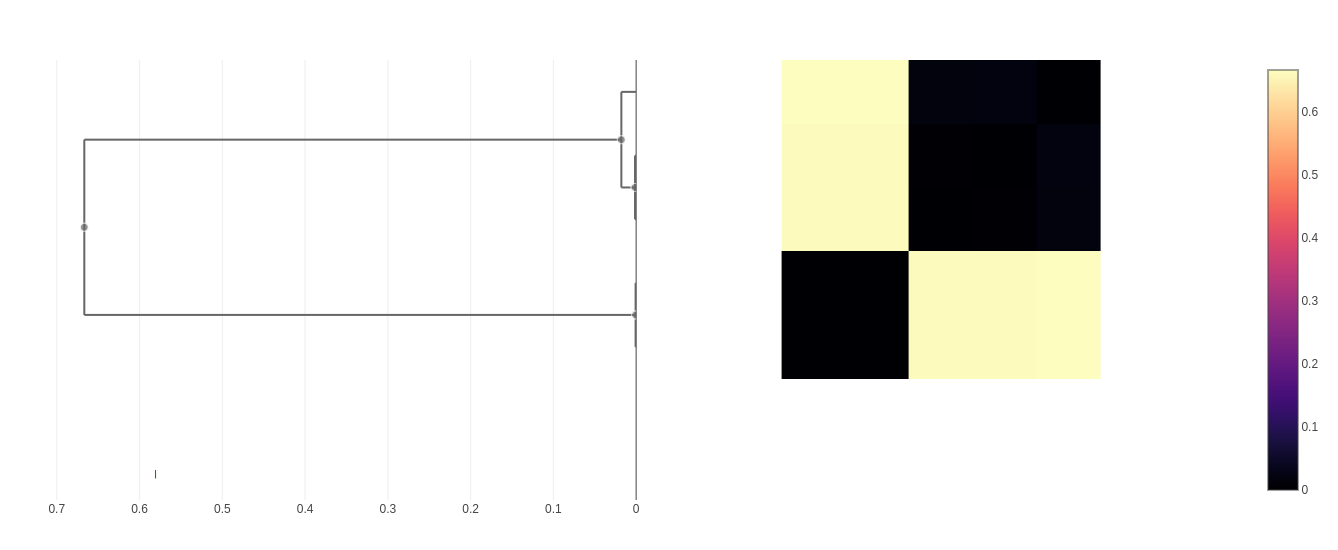

In [13]:
plot(clustermap(cdata2, "pseudopneumoniae subgroup 2"))

In [14]:
set_threshold!(edits2, "pseudopneumoniae subgroup 2", .5)

0.5

## Finish

In [15]:
complete_edits(edits, edits2)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Float64?,String
1,1,pneumoniae,6815,0.773292,0,6,,missing,0.5860
2,2,mitis,4,0.762209,0,0,,0.5,0.7622
3,3,pseudopneumoniae,11,0.846564,0,0,"6, 5",missing,"0.4875, 0.6667"
